# <font color=navy>1. Review: Frequentist's Methods </font>

## 1.1 평균에 대한 검정 
### 1.1.0 Example: Web Stickiness 

- 고가의 상품을 판매하는 온라인 쇼핑몰
- 방문자가 웹페이지에 머무르는 시간이 길수록 구매로 이어짐
- 한 웹관리자는 평균 session time이 길어야 160초이고 이를 늘리기 위해 새로운 웹 프레젠테이션이 필요하다고 주장함 

#### Question
- 평균 session time은 몇 초일까? 
- 평균 session time과 평균으로 예측했던 값 간의 차이에 통계적 유의성이 있을까?
- 평균 session time의 불확실성의 수준이 어느 정도일까? 
    
Note: 구매가 빈번히 일어나지 않기 때문에 단순 평균값만을 의지하여 결론을 내리기에 충분한 방문자 통계를 얻기까지 시간이 오래 걸려 36개의 방문자 통계 만을 사용하기로 함


In [1]:
from pathlib import Path
import random

import pandas as pd
import numpy as np
import pylab 
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import weightstats
from statsmodels.stats import proportion
from scipy.stats import t

import matplotlib.pylab as plt
%matplotlib inline

data_path = "../data/"

In [2]:
session_times = pd.read_csv(data_path + 'web_page_data.csv')
session_times.Time = 100 * session_times.Time # 초 단위로 변환

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


### 1.1.1 점추정 
- (모든 방문자의) 평균 session time을 하나의 숫자로 추정하면 무엇일까?

In [3]:
session_times.Time.mean()

141.19444444444446

- 표본 평균은 141.19: <font color="blue"> 점추정치</font>
    - 36개 관측치만을 사용한 표본 평균이 실제 평균과 같을 가능성 거의 없음 
    

### 1.1.2 구간추정

- 만약 또 다른 36개의 관측치를 얻었다면 그 평균은 무엇일까? 만일 이 과정을 무수히 반복한다면 그 평균은 어떤 분포를 가질까? 
- Note: 모집단의 평균은 물론 분산에 대한 정보를 가지고 있지 않음

#### Student's t-Distribution
- 평균이 $\mu$, 분산이 $\sigma^2$인 정규분포를 가지는 모집단에서 추출한 $n$개의 표본의 평균을 $\bar X$, 표본분산을 $S^2$라고 하자. 
$$ T =  \frac{(\bar X - \mu)}{S/\sqrt n}$$ 
$T$의 분포는 자유도가 $n-1$인 t분포이다. 

> Recall: 표본평균의 표본분포 
$$ \frac{\bar X-\mu}{\sigma/\sqrt{n}} \rightarrow N \left(0,1 \right) $$

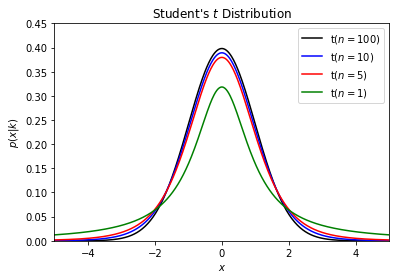

In [4]:
df_values = [100, 10, 5, 1]
colors = ['k','b','r','g']
x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(figsize=(6, 4))

for k, color in zip(df_values, colors):
    dist = t(k)
    label = r'$\mathrm{t}(n=%i)$' % k
    plt.plot(x, dist.pdf(x), c=color, label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

In [5]:
dist = t(35)
dist.ppf([0.025, 0.975])

array([-2.03010793,  2.03010793])

#### 신뢰구간 (Confidence Interval)
- 점추정 값을 중심으로 어느 정도의 구간을 택해 실제 평균값이 그 안에 들어갈 가능성이 95% (혹은 98%, 99%) 되도록 추정 
- 구간추정값의 목적은 점추정값이 모수에 얼마나 근사한지에 관한 정보를 제공하는 것이다.            

<img src="http://knowledgehills.com/content/images/Six-Sigma/482x266xSix-Sigma-t-Confidence-Interval-Mean-Chart.gif.pagespeed.ic.IwnPUY7L6d.png" width=500>
$$ \bar x \pm t_{\alpha/2} \frac s {\sqrt{n}}$$

- $\alpha$: <font color="blue"> 유의수준 (significance level)</font>   
- $1-\alpha$: <font color="blue">신뢰수준 (confidence level)</font>    
- $t_{\alpha/2}$: <font color="blue">자유도 (degree of freedom)</font> n – 1을 가지는 t 분포의 오른쪽 꼬리 $\alpha/2$에 해당하는 면적에 대한  t 값       
- $s$: 표본 표준편차

In [6]:
stat = weightstats.DescrStatsW(session_times.Time)
stat.tconfint_mean(alpha=0.05)

(109.30798906792316, 173.08089982096575)

#### 신뢰구간의 해석
- 웹페이지 방문자의 평균 session time이 109.3초와 173.1초 사이일 가능성이 95% 이다.
    - 다른 표본을 사용하면 (109.3, 173.1)이 아닌 다른 신뢰구간을 얻게 됨
    - 실제 평균값은 우리는 모르지만 이미 정해진 숫자값 (다른 표본을 사용해도 변하지 않음)
    - 95%의 의미: 다른 표본을 사용하여 CI 계산하는 것을 100,000번 반복하면 그중 95%인 95,000개의 CI는 실제 참 평균값을 포함한다.  

 <img src="http://drive.google.com/uc?export=view&id=1pHADHywxl5SgapK4EmFCnJ9CFZYV2utv" width=300>


#### 신뢰구간과 신뢰수준 
- 실제 평균을 포함하기를 보다 확신 할수 있는 (95%가 아니라 99%) 신뢰구간을 구한다면 신뢰구간은 어떻게 변할까? (어느 정도의 오차를 감수할 것인가?)

#### 신뢰구간과 표본 크기 
- 36개 방문자 데이터가 아닌 100개 데이터를 사용한다면 신뢰구간은 어떻게 변할까? 

&nbsp;

&nbsp;

### 1.1.3 가설검정 (Hypothesis Testing) : 단일표본 T-검정 (One-sample T-Test)
 Q: 한 웹관리자는 평균 session time이 기껏해야 160초라고 주장하였다. 이 주장이 얼마나 믿을만 한가? 
 

- 통계적 가설검정 
     - 내가 세운 가설이 표본통계량을 기반으로 진위여부를 따지는 통계적 추론방식 

#### <font color=blue> 단일표본 T-검정 (One-sample T-Test) </font>
- 하나의 집단의 특성 중 평균에 대한 가설검정 
- 관심 대상이 되는 변수가 양적변수(quantitative variable)인 경우
- Example
    - 200ml 탄산음료가 표시된 것보다 양이 적다는 민원이 제기되었다. 이를 확인하기 위해 공장관리자는 무작위로 추출한 50개의 음료를 대상으로 그 양을 측정하여 확인하고자 한다. 
    - 한 브랜드의 매출(Revenue)은 평균 40,000달러라고 알려져 있다. 최근 이 브랜드 마케팅팀은 오랫동안 구매를 하지 않은 고객에게 방문을 유도하는 푸쉬메시지를 보냈다고 한다. 푸쉬메시지가 브랜드의 매출(Revenue)에 영향을 미쳤는지 알고자 한다. 

- 가설검정 절차
    1. 귀무가설, 대립가설 설정
    2. 유의수준 $\alpha$ 설정 
    3. 가정체크
    4. 검정통계량과 P-value 계산 
    5. 결론 

#### 1. 가설 설정 

##### <font color="blue">귀무가설</font> ($H_0$, null hypothesis)|
- 직접 검정의 대상이 되는 가설 
- 증명된 바 없는 가설: 이것이 참이라고 가정하고 가설검정을 진행 (비교: 무죄 추정의 원칙)
- '아무 일도 일어나지 않는다', 보수적인 입장 
- 귀무가설을 기각(reject)하는 것이 일반적인 목표 
- 수식으로 표현 시 등호(=)를 포함

##### <font color="blue">대립가설</font> ($H_1$ or $H_a$, alternative hypothesis)
- 귀무가설이 기각될 때 받아들여지는 가설 
- 새로운 주장, 내가 증명하고 싶은 주장
- 데이터를 통해 귀무가설이 확실히(?) 일어나지 않을 것이라 판단될 때 귀무가설을 기각하고 대립가설로 결론 


- 귀무가설    
  $$H_0: \mu=160 \mbox{ (or } \mu \geq 160)$$

- 대립가설    
  $$H_1: \mu < 160$$
    

    
#### 2. 유의수준의 설정

##### <font color="blue"> 유의수준 ($\alpha$) </font>
- 귀무가설이 참인데 귀무가설을 기각할 확률
- 귀무가설이 사실이라고 가정할 때 표본 통계량이 얼마나 극단적인 값(일어날 확률이 낮은 값)이어야 귀무가설이 사실이 아니라고 판단할 지에 대한 임계값
- 얼마만큼의 제 1종 오류를 가설검정 과정에서 감당할 것인가?
- 일반적으로 $\alpha=0.01, 0.05, 0.1$으로 설정 
<img src='http://drive.google.com/uc?export=view&id=1xPPMDBQQcZGiAVn3ZgtV1Ik28UnPTtt9' /><br>    

<img src='http://drive.google.com/uc?export=view&id=1407cWyyoHVURbb6iu6WfUWuLACtnrLhi' /><br>
   

- $\alpha=0.05$


#### 3. 가정 체크 
- One-sample T-test의 가정 
    - 표본평균이 t-distribution을 따른다는 가정을 만족해야 그에 따른 확률값을 사용하여 가설검정 진행
    - 아래 두 조건 중 하나를 만족
        1. 자료가 정규분포를 따른다 (분포가 종모양)
        2. 심하게 편중되거나 극단치를 포함한 경우 표본수가 50개 (혹은 30개) 이상이다.
- 두 조건 중 하나를 만족하지 않으면 Wilcoxon signed-rank과 같은 비모수 검정법을 이용 
- 정규분포의 확인 방법 
     - Histogram, Boxplot, Q-Q plot, Shapiro-Wilks test

<AxesSubplot:>

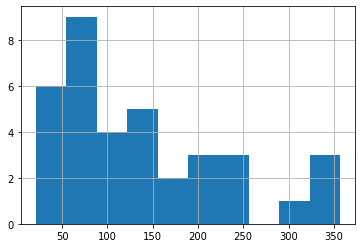

In [7]:
# Histogram
session_times.Time.hist()

<AxesSubplot:>

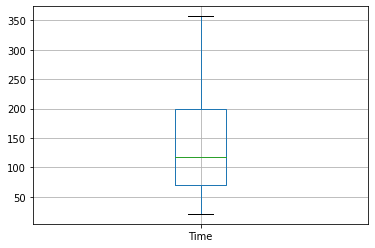

In [8]:
# Boxplot
session_times.boxplot('Time')

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([ 21.,  35.,  39.,  43.,  45.,  48.,  65.,  67.,  68.,  71.,  74.,
          75.,  85.,  86.,  87.,  93.,  95., 118., 118., 126., 132., 147.,
         147., 149., 173., 187., 197., 206., 211., 223., 246., 253., 321.,
         333., 342., 357.])),
 (92.85118065271232, 141.19444444444449, 0.9527118631500447))

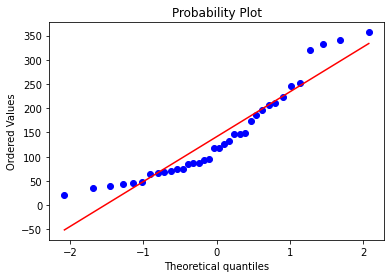

In [9]:
# Q-Q plot
stats.probplot(session_times.Time, dist="norm", plot=pylab, )

In [10]:
# Shapiro-Wilks Test
stats.shapiro(session_times.Time)

ShapiroResult(statistic=0.8981886506080627, pvalue=0.003045543795451522)

>- Shapiro-Wilk normality test
>    - 귀무가설: 분포가 정규분포를 따름 
>    - p-value>0.05 : 데이터가 정규분포를 따른다고 결정 $\rightarrow$ t-test 진행
>    - p-value<0.05 : 데이터가 정규분포를 따르지 않는다고 결정  $\rightarrow$ 관측수가 충분히 크면 t-test 진행, 그렇지 않으면 Wilcoxon signed rank test 


- 가정 체크 결과
    - boxplot에서 이상치가 보이지는 않지만 오른쪽으로 꼬리가 긴 분포를 가지고 있음 
    - Q-Q plot의 점들이 직선으로 보기에는 무리가 있음 (즉, 정규분포가 아님)
    - Shapiro-Wilks test 결과 p-value가 0.05보다 작으므로 정규분포라 할 수 없음
    - 하지만 표본 수가 36(>30)으로 양호한 수준이므로 가정을 만족

#### 4. 검정통계량과 P-value의 계산
- 귀무가설이 참이라고 가정할 때 아래의 T-통계량은 자유도 n-1을 가지는 t분포를 따름  
    $$ \mbox{T-statistics} =\frac{\bar x - \mu_0 }{s/\sqrt n } \sim t_{n-1}$$

##### <font color=blue>P-value</font>
- 귀무가설이 참이라 가정할 때 관심 사건의 검정통계량을 계산하고  이 값과 같거나 더 극단적인 경우에 놓일 (대립가설에 우호적인 방향일) 확률의 추정치
  <img src='http://drive.google.com/uc?export=view&id=1WqlHpLgEoEhYOKKa8Da-Xl6PdPpzhObC' width=400/><br>
  

- 검정통계량이 많이(?) 작다는 것은 표본평균이 $\mu_0$보다 많이 작다는 것이고 이는 귀무가설이 참일 것 같지 않음을 나타냄 $\Rightarrow$ 작은 p-value 
- 얼마나 작아야 작다고 판단할 것인가? 기준: 유의수준 $\alpha$
- p-value$<\alpha$ $\Rightarrow$ 귀무가설 기각 

##### Note
   - '귀무가설을 기각하지 않는다' $\neq$ '귀무가설이 참이다' 
   - 표본 크기가 작거나 측정오차 큰 경우 거짓인 귀무가설을 기각하지 못할 수도 있음
   - 표본 크기가 지나치게 크면 참인 귀무가설을 기각할 수도 있음

In [11]:
t_result = stat.ttest_mean(value = 160, alternative='smaller')
print('T_statistics: %.3f, p-value: %.3f, degrees of freedom: %i' %(t_result))

T_statistics: -1.197, p-value: 0.120, degrees of freedom: 35


#### 5.  결론
- P-value =  0.12 > $\alpha (=0.05)$

- 유의수준 0.05에서 귀무가설을 기각하지 못함 

- $\alpha=0.05$일 때, session time의 평균이 160초보다 작다는 충분한 통계적 근거가 없음 


### 1.1.4 양측검정 vs. 단측검정 
    
- 단측검정 

    - $H_1: \mu < 160$:  $\mu$가 160보다 작은지에만 관심
    - $H_1: \mu > 160$:  $\mu$가 160보다 큰지에만 관심


- 양측검정

    $H_1: \mu \neq 160$: $\mu$가 160보다 작거나 큰지 확인하고 싶음 

<img src='http://drive.google.com/uc?export=view&id=1gAgu-wQz_8eksoYyf0NeXMfB7uNaEtFI' /><br>

In [12]:
# Right-handed test
t_result = stat.ttest_mean(value = 160, alternative='larger')
print('T_statistics: %.3f, p-value: %.3f, degrees of freedom: %i' %(t_result))

T_statistics: -1.197, p-value: 0.880, degrees of freedom: 35


In [13]:
# Two-sided test
t_result = stat.ttest_mean(value = 160, alternative='two-sided')
print('T_statistics: %.3f, p-value: %.3f, degrees of freedom: %i' %(t_result))

T_statistics: -1.197, p-value: 0.239, degrees of freedom: 35



## 1.2 단일표본 비율에 대한 추론 

### 1.2.0 Example: Conversion rate
- 한 온라인 쇼핑몰 운영자는 현재 진행하는 광고에 노출된 사용자의 몇 %가 광고를 클릭하는지 알고 싶다. 지난 달 관찰한 결과 23739 건의 노출 중 200건의 광고 클릭이 발생하였다.
    - **전환율(conversion rate)**: 웹사이트 방문자가 회원으로 가입하거나, 무언가를 구매하거나, 기타 다른 행동을 하는 비율

### 1.2.1 신뢰구간

$$ \hat p \pm z_{\alpha/2}\sqrt{\frac{\hat p (1-\hat p) }{n }}$$

- $\hat p$: 표본 비율 
- $z_{\alpha/2}$: 표준 정규분포 $N(0,1)$에서 오른쪽 꼬리 면적이 $\alpha/2$가 되는 z값


> Recall: 표본 비율의 표본분포 
>$$\hat p =\frac X n \approx N\left (p, \sqrt{\frac{p(1-p)}{n}}^2 \right) $$
>- $n$ 이 충분히 크면 표본비율의 분포가 $N(p, p(1-p)/n)$에 근사함 
>- 일반적으로 $np>5$와 $n(1-p)>5$를 동시에 만족하면 충분히 크다고 여김

In [14]:
proportion.proportion_confint(count = 200, nobs = 23739, alpha = 0.05)

(0.007262265986445213, 0.009587643445291592)

- 95% 신뢰수준에서 광고 클릭한 사용자의 비율은 0.7%와 1.0% 사이이다. 

### Example: "선거연령 18세로 낮춰야" 여론 팽팽 
http://www.hankookilbo.com/News/Read/201903250981056594?did=NA&dtype=&dtypecode=&prnewsid=

### 1.2.2 가설검정 
#### Example: Conversion Rate
- 한 온라인 쇼핑몰 운영자는 현재 진행하는 광고에 노출된 사용자의 1%가 광고를 클릭 한다고 주장하였다. 지난 달 관찰한 결과 23739 건의 노출 중 200건의 광고 클릭이 발생하였다. 광고 운영자의 주장은 사실인가?


#### <font color=blue>단일표본 비율에 대한 Z-검정 (One-proportion Z-test) </font>
- 모집단에서 특정 사건이 발생하는 비율에 대한 가설 검정 
- Yes/No 혹은 0/1로 코딩되는 질적변수를 사용 

#### 1. 가설설정

- $H_0$:
- $H_1$:

&nbsp;

#### 2. 유의수준 설정 

$\alpha=0.05$
#### 3. 가정체크

- $np=$
- $n(1-p)=$

&nbsp;

#### 4. 검정통계량과 P-value 계산

$$Z=\frac{\hat p - p_0 }{\sqrt{p_0(1-p_0)/n}} \sim N(0,1) $$
    



&nbsp;
&nbsp;


In [15]:
ztest_result = proportion.proportions_ztest(count = 200, nobs = 23739, value = 0.01, alternative = 'two-sided')
print('Z-statistics: %.3f, p-value: %.3f' %(ztest_result))

Z-statistics: -2.655, p-value: 0.008


#### 5. 결론 
- p-value=0.008<0.05
- 귀무가설을 기각함
- Conversion rate이 1%와 같다고 할 수 없음

## 1.3 통계적 추론 방법 정리 
### 양적변수(평균)에 대한 추론 
- y = 양적변수 

`` import statsmodels.stats.weightstats as stat``

|     문제                          |      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 관심모수    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;    |     &nbsp;&nbsp;&nbsp;&nbsp;  점추정량   &nbsp;&nbsp;&nbsp;&nbsp;     |                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   가정체크  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      검정가설  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        |                                         검정방법/Python 명령어                                         |
|:-------------------------------:|:------------------------------:|:---------------------------:|:--------------------------------------------------:|:-----------------------:|:----------------------------------------------------------------------------------------:|
| 한 그룹 평균                   | $\mu$                  | $\bar x$              | $n>30 (>50)$ </br> or 정규분포                     | $H_0: \mu=\mu_0$        |One-sample T-test <br>  ``stat.ttest_mean``         |
| 두 그룹 평균 비교(독립표본)   | $\mu_1-\mu_2$          | $\bar x_1 - \bar x_2$ | $n_1 + n_2>30(>50)$ <br> 두 집단 모두 정규분포  | $H_0: \mu_1 - \mu_2 = 0$| Two-sample t-test <br> ``stat.ttest_ind`` |
| 두 그룹 평균 비교 (쌍체표본)  | $\mu_d$                | $\bar x_d$            | $n>30 (>50)$ </br> or 정규분포                     | $H_0: \mu_d=0$          | Paired t-test <br>``stat.ttest_mean`` |
| 셋 이상 그룹 평균 비교        | $\mu_1, \ldots, \mu_m$ |  $\hat\mu_1, \ldots, \hat\mu_m$                      |  $n_i>30 (>50)$  or 정규분포 <br> 등분산| $H_0: \mu_1 = \cdots = \mu_m$ |ANOVA <br> ``class statsmodels.stats.anova.AnovaRM``
| 양적변수 간의 상관관계               | $y=\beta_0+\beta_1 x+\epsilon$ <br>$\beta_0, \beta_1$     |   $\hat \beta_0, \hat \beta_1$                    |                                                                                                                                                      선형성, 독립성, 등분산성, 정규성                    | $H_0: \beta_i=0$                       | Regression <br>`statsmodels.api.OLS`                                                  |

### 범주형변수(비율)에 대한 추론 
- y = 범주형 변수  

|      문제             |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    모수&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;점추정량&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 가정체크  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;검정가설        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                                                                   | 검정방법                                                      |
|:-------------------:|:--------------------:|:-------------------------------:|:------------------------------------------------------------:|:------------------------------------------------------------------------------------:|:---------------------------------------------------------------:|
| 한 그룹 비율      | $p$                | $\hat p$                      | $np>5$<br> $n(1-p)>5$                                          | $H_0: p=p_0$                                                                       | Z-test  <br> ``statsmodels.stats.proportion.proportions_ztest``                |
| 두 그룹 비율 비교     | $p_1 - p_2$        | $\hat p_1 - \hat p_2$         | $n_i p_i >5$<br>$ n_i (1-p_i)>5$  | $H_0: p_1-p_2=0$                                                                   | Z-test <br> ``statsmodels.stats.proportion.proportions_ztest``  |
| 적합성 검정       | $p_1, \ldots, p_m$ | $\hat p_1, \ldots, \hat p_m$  | 모든 기대빈도>5                                            | $H_0: p_1=p_{01}, \ldots, p_m=p_{0m}$        | Chi-square test<br>``scipy.stats.chisquare``|
| 독립성 검정       |                    |                               | 모든 기대빈도>5                                            | $H_0:$ 두 범주형 변수가 독립이다.  | Chi-square test <br>``scipy.stats.chi2_contingency``         |
| 양적변수와의 관계 |$logit(p)=\beta_0+\beta_1 x$ <br> $\beta_0, \beta_1$ |   $\hat \beta_0, \hat \beta_1$                            |                                                   종속변수가 이항분포         |                                                                         $H_0: \beta_i=0$           | Logistic regression <br>``sklearn.linear_models.LogisticRegression ``| 

## 1.4 최대우도추정법 (Maximum Likelihood Estimation; MLE)
**Q: 점추정치는 어떻게 찾는가?**
- 왜 모집단의 conversion rate을 추정하기 위해 $\hat p = x/n$을 사용하는가?
- 왜 모집단의 session time을 추정하기 위해 $\bar x$를 사용하는가? 
- 위의 예는 너무 자명해서 당연한 것으로 생각되지만 조금 복잡한 모형에서는 우리가 원하는 모수 추정치를 계산하는게 언제나 간단하지는 않다. 
- **최대우도추정법**: 점추정치를 찾는데 사용되는 한 가지의 원리 

### Example: 이항분포
$X$: 한 온라인쇼핑몰 사용자가 광고를 클릭하는지 여부 (0 or 1)
$$ X \sim Bin(1,p)$$
$$ f(x) = p^x (1-p)^{1-x},~~ x=  0,1 ~~ 0\leq p \leq 1$$

$n$ 명의 독립적인 사용자의 X값을 $X_1, X_2, \ldots, X_n$이라고 하고 데이터를 관할한 결과 데이터 관측치 $x_1, x_2, \ldots, x_n$을 얻었다고 하자. 이 때, $X_1, \ldots, X_n$이 $x_1, \ldots, x_n$의 값을 취할 확률은 아래와 같다. 
$$p(x_1, x_2, \ldots, x_n) = \prod_{i=1}^n p^{x_i} (1-p)^{1-x_i} = p^{\sum x_i} (1-p)^{n-\sum x_i} $$
- 위의 식은 관측치에서 평가된 결합확률질량함수이다.
- Q: $p$의 정확한 추정치를 어떻게 찾을 수 있을까? 
    - 위의 식을 $p$의 함수로 보고 그것을 최대화 하는 $p$값을 구하는 것 
    - 관측된 데이터 $x_1, x_2, \ldots, x_n$를 가장 잘 산출해냈음직한 $p$값을 구하는 것 
    

#### 우도함수 (Likelihood function) 
$$L(p) = p^{\sum x_i} (1-p)^{n-\sum x_i}, ~~ 0 \leq p \leq 1 $$
- 결합확률질량함수를 $p$의 함수로 보면 그것이 우도함수이다. 
- 이 함수를 최대화 시키는 $p$를 찾는 것이 목적 

#### 최우추정량 (MLE; maximum likelihood estimator)
- $L(p)$를 최대화 하는 $p$를 직접 계산하기 보다는 많은 경우 $\log L(p)$, 즉, log-likelihood를 최대화 하는 $p$를 찾는 것이 쉽다. 